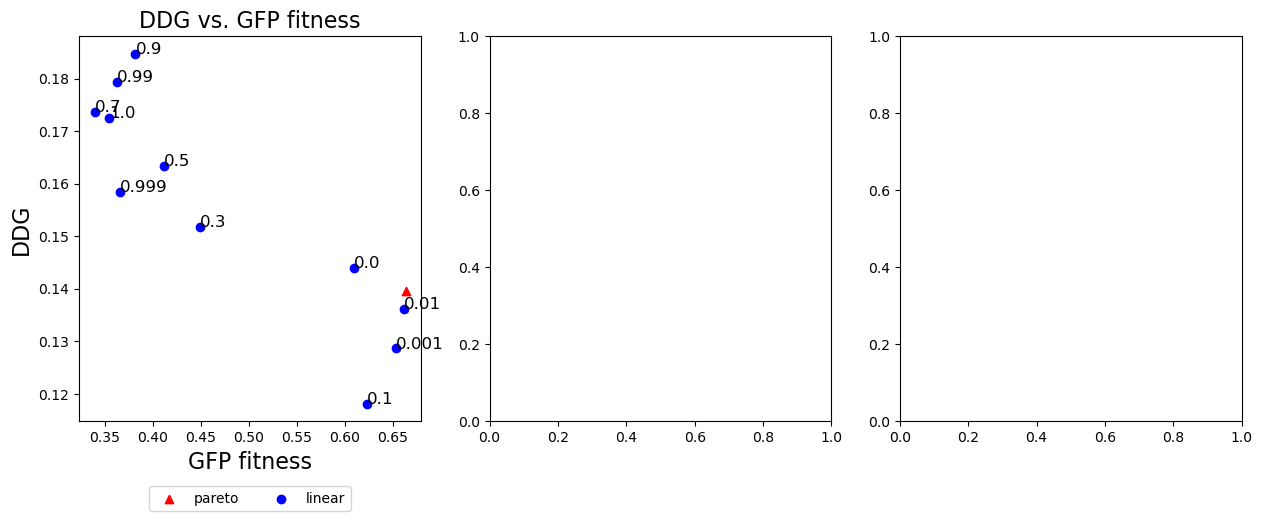

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_metric_point_label(csv_path, label, rows=[0,1], metric_col='mean'):
    df = pd.read_csv(csv_path)
    metrics = df[metric_col].values[rows]
    x = metrics[0]
    y = metrics[1]
    
    return x, y, label

DDG_GFP_labels = []
csv_path_label = [['../logs_mgda_linear_1024/GWG_2_2023_10_24__14_57_51/samples_20231024-145751/evaluation_metrics_random_selection.csv', 'pareto'],
                  ['../logs_mgda_linear_1024/GWG_2_GFP_stability_linear_2023_10_24__15_32_18_weight_0.0/samples_20231024-153218/evaluation_metrics.csv', 'linear_0.0'],
                  ['../logs_mgda_linear_1024/GWG_2_GFP_stability_linear_2023_10_24__15_34_43_weight_0.001/samples_20231024-153443/evaluation_metrics.csv', 'linear_0.001'],
                  ['../logs_mgda_linear_1024/GWG_2_GFP_stability_linear_2023_10_24__15_37_01_weight_0.01/samples_20231024-153701/evaluation_metrics.csv', 'linear_0.01'],
                  ['../logs_mgda_linear_1024/GWG_2_GFP_stability_linear_2023_10_24__15_39_07_weight_0.1/samples_20231024-153907/evaluation_metrics.csv', 'linear_0.1'],
                  ['../logs_mgda_linear_1024/GWG_2_GFP_stability_linear_2023_10_24__15_40_56_weight_0.3/samples_20231024-154056/evaluation_metrics.csv', 'linear_0.3'],
                  ['../logs_mgda_linear_1024/GWG_2_GFP_stability_linear_2023_10_24__15_42_42_weight_0.5/samples_20231024-154242/evaluation_metrics.csv', 'linear_0.5'],
                  ['../logs_mgda_linear_1024/GWG_2_GFP_stability_linear_2023_10_24__15_44_31_weight_0.7/samples_20231024-154431/evaluation_metrics.csv', 'linear_0.7'],
                  ['../logs_mgda_linear_1024/GWG_2_GFP_stability_linear_2023_10_24__15_46_16_weight_0.9/samples_20231024-154616/evaluation_metrics.csv', 'linear_0.9'],
                  ['../logs_mgda_linear_1024/GWG_2_GFP_stability_linear_2023_10_24__15_48_00_weight_0.99/samples_20231024-154800/evaluation_metrics.csv', 'linear_0.99'],
                  ['../logs_mgda_linear_1024/GWG_2_GFP_stability_linear_2023_10_24__15_49_42_weight_0.999/samples_20231024-154942/evaluation_metrics.csv', 'linear_0.999'],
                  ['../logs_mgda_linear_1024/GWG_2_GFP_stability_linear_2023_10_24__15_51_21_weight_1.0/samples_20231024-155121/evaluation_metrics.csv', 'linear_1.0'],
                  ['../logs_new/train_predictor_stability_0.2_0.4_2023_09_30__10_43_49/samples_20230930-104911/evaluation_metrics_random_selection.csv', 'GWG_ddg'],
                  ['../logs_new/train_smooth_GFP_2023_09_30__13_34_58/samples_20230930-135740/evaluation_metrics_random_selection.csv',
                   'GWG_GFP']]

for csv_path, label in csv_path_label:
    DDG_GFP_labels.append(load_metric_point_label(csv_path, label, [0,1], 'mean_fitness'))
DDG, GFP, labels_DDG_GFP = zip(*DDG_GFP_labels)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

colors = plt.cm.jet(np.linspace(0, 1, 6))
# axs[0].scatter(GFP, DDG, s=50, c='red')
# Create a scatter plot for each point
pareto_legend_added = False
linear_legend_added = False
GWG_legend_added = False
pareto_GFP, pareto_DDG = [], []
pareto_count = 0
for i, (x, y, label) in enumerate(zip(GFP, DDG, labels_DDG_GFP)):
    if 'pareto' in label:
        axs[0].scatter(x, y, color='red', marker='^', label='pareto' if not pareto_legend_added else None)  # Triangle marker for labels containing 'weight'
        pareto_legend_added = True
        pareto_GFP.append(x)
        pareto_DDG.append(y)
        pareto_count += 1
    elif 'linear' in label:
        axs[0].scatter(x, y, color='blue', marker='o', label='linear' if not linear_legend_added else None)
        axs[0].annotate(label[7:], (x, y), fontsize=12)
        linear_legend_added = True
    elif 'GWG' in label:
        axs[0].scatter(x, y, color='green', marker='s', label='GWG' if not GWG_legend_added else None)
        axs[0].annotate(label[4:], (x, y), fontsize=12)
        GWG_legend_added = True
    else:
        axs[0].scatter(x, y, color=colors[i-pareto_count], label=label)
axs[0].set_xlabel('GFP fitness', fontsize=16)
axs[0].set_ylabel('DDG', fontsize=16)
axs[0].set_title('DDG vs. GFP fitness', fontsize=16)
# Display the legend below the plot
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=3)